<a href="https://colab.research.google.com/github/chenant2017/covid/blob/main/Covid_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PSI

In [ ]:
%cd ~/long_covid/firsts
!ls

/home/chenant/long_covid/firsts
out  psi  sig_exons


In [ ]:
from class_exon import get_exon_class
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:


def get_header(bams):
  runs = [[k.split(".")[0] for k in [j.split("/")[-1] for j in i.split(",")]] for i in bams.split("\n")]
  return runs[0] + runs[1]

def GetPSI(filename, min_count=15, qmin=0.05, qmax=0.95, header=None, bams=None, out=None, skip_filter=False):
  """ GetPSI in rMATS output.

  Added filters to select high-confidence alternative splicing events.
  The following criteria are recommended:
  • Read coverage: average RNA-seq read count ≥ 10 across all samples. (10/50)
  • PSI value: filter out events with average PSI value < 0.05 or > 0.95 in both sample groups.

  Args:
    filename: input file
    min_count: minimal average read count across all samples.
    qmin: min quantile to be aligned. Default 5%.
    qmax: max quantile to be aligned. Default 95%.
    skip_filter: whether to skip exon filter
  """

  exon, event_type = get_exon_class(filename)
  print(filename, "||||", event_type)
  n = 0
  id = [] #exon IDs
  psi = [] #all PSI values
  with open(filename, "r") as fin:
    fin.readline()
    for line in fin:
        x = exon(line)
        print(x.FDR)
        tpsi = np.array([i for i in (x.IncLevel1 + x.IncLevel2)]) #array of PSI of all samples. IMPORTANT: IncLevel means PSI
        if np.all(np.isnan(tpsi)):
          continue
        mean_psi = np.nanmean(tpsi)
        tpsi[np.isnan(tpsi)] = mean_psi #replace nan with mean
        if not skip_filter:
          if mean_psi < qmin or mean_psi > qmax or x.averageCount < min_count:
            continue
        id.append(x.uniqID)
        psi.append(tpsi)
  psi = pd.DataFrame(psi, index=id)
  if bams is not None:
    header = get_header(bams)
  if header:
    psi.columns = header
  if out:
    psi.to_csv(out, sep="\t")
  return  psi

In [ ]:
psi_col = "SRR21924606,SRR21924610,SRR21924611,SRR21924620,SRR21924622,SRR21924623,SRR21924627,SRR21924637,SRR21924638,SRR21924639,SRR21924640,SRR21924641,SRR21924642,SRR21924643,SRR21924644,SRR21924645,SRR21924648,SRR21924657,SRR21924662,SRR21924663,SRR21924666,SRR21924669,SRR21924677,SRR21924688,SRR21924689,SRR21924692,SRR21924696,SRR21924699,SRR21924703,SRR21924711,SRR21924712,SRR21924713,SRR21924714,SRR21924716,SRR21924728,SRR21924736,SRR21924747,SRR21924748,SRR21924749,SRR21924754,SRR21924761,SRR21924767,SRR21924773,SRR21924778,SRR21924781,SRR21924788,SRR21924792,SRR21924797,SRR21924803,SRR21924812,SRR21924820,SRR21924828,SRR21924831,SRR21924839,SRR21924844,SRR21924850,SRR21924857,SRR21924860,SRR22193993,SRR22193997,SRR22194000,SRR21923477,SRR21923478,SRR21923479,SRR21923480,SRR21923481,SRR21923482,SRR21923483,SRR21923484,SRR21923485,SRR21923486,SRR21923490,SRR21923495,SRR21923497,SRR21923506,SRR21923508,SRR21923511,SRR21923513,SRR21923515,SRR21923517,SRR21923521,SRR21923525,SRR21923532,SRR21923537,SRR21923538,SRR21923539,SRR21923540,SRR21923541,SRR21923542,SRR21923543,SRR21923544,SRR21923545,SRR21923549,SRR21923550,SRR21923555,SRR21923559,SRR21923561,SRR21923562,SRR21923567,SRR21923578,SRR21923581,SRR21923582,SRR21923583,SRR21923584,SRR21923585,SRR21923586,SRR21923587,SRR21923588,SRR21923589,SRR21923590,SRR21923592,SRR21923593,SRR21923598,SRR21923607,SRR21923609,SRR21923610,SRR21923616,SRR21923618,SRR21923622,SRR21923623,SRR21923624,SRR21923631,SRR21923639,SRR21923640,SRR21923643,SRR21923648,SRR21923655,SRR21923659,SRR21923660,SRR21923663,SRR21923666,SRR21923672,SRR21923677,SRR21923681,SRR21923691,SRR21923696,SRR21923697,SRR21923702,SRR21923703,SRR21923715,SRR21923723,SRR21923729,SRR21923730,SRR21923731,SRR21923732,SRR21923733,SRR21923734,SRR21923735,SRR21923736,SRR21923737,SRR21923741,SRR21923743,SRR21923746,SRR21923751,SRR21923763,SRR21923766,SRR21923767,SRR21923772,SRR21923776,SRR21923778,SRR21923781,SRR21923789,SRR21923809,SRR21923813,SRR21923823,SRR21923831,SRR21923845,SRR21923865,SRR21923871,SRR21923874,SRR21923885,SRR21923896,SRR21923897,SRR21923906,SRR21923912,SRR21923914,SRR21923916,SRR21923919,SRR21923930,SRR21923932,SRR21923939,SRR21923941,SRR21923948,SRR21923953,SRR21923958,SRR21923967,SRR21923968,SRR21923969,SRR21923975,SRR21923981,SRR21923984,SRR21923989,SRR21923996,SRR21924001,SRR21924005,SRR21924011,SRR21924016,SRR21924026,SRR21924030,SRR21924034,SRR21924039,SRR21924048,SRR21924054,SRR21924055,SRR21924063,SRR21924066,SRR21924068,SRR21924072,SRR21924076,SRR21924077,SRR21924081,SRR21924085,SRR21924086,SRR21924088,SRR21924102,SRR21924110,SRR21924113,SRR21924122,SRR21924126,SRR21924128,SRR21924131,SRR21924132,SRR21924134,SRR21924144,SRR21924150,SRR21924152,SRR21924159,SRR21924165,SRR21924167,SRR21924172,SRR21924177,SRR21924178,SRR21924179,SRR21924180,SRR21924181,SRR21924182,SRR21924183,SRR21924184,SRR21924185,SRR21924186,SRR21924187,SRR21924188,SRR21924192,SRR21924198,SRR21924201,SRR21924205,SRR21924210,SRR21924214,SRR21924215,SRR21924225,SRR21924226,SRR21924240,SRR21924251,SRR21924259,SRR21924261,SRR21924264,SRR21924265,SRR21924267,SRR21924272,SRR21924274,SRR21924279,SRR21924281,SRR21924284,SRR21924289,SRR21924295,SRR21924299,SRR21924303,SRR21924306,SRR21924313,SRR21924315,SRR21924317,SRR21924321,SRR21924325,SRR21924329,SRR21924330,SRR21924336,SRR21924339,SRR21924342,SRR21924359,SRR21924363,SRR21924372,SRR21924375,SRR21924379,SRR21924382,SRR21924387,SRR21924388,SRR21924389,SRR21924390,SRR21924398,SRR21924400,SRR21924411,SRR21924412,SRR21924420,SRR21924422,SRR21924426,SRR21924430,SRR21924434,SRR21924435,SRR21924439,SRR21924444,SRR21924451,SRR21924452,SRR21924453,SRR21924461,SRR21924463,SRR21924466,SRR21924468,SRR21924475,SRR21924478,SRR21924483,SRR21924484,SRR21924488,SRR21924491,SRR21924501,SRR21924508,SRR21924509,SRR21924512,SRR21924518,SRR21924524,SRR21924526,SRR21924534,SRR21924538,SRR21924543,SRR21924545,SRR21924550,SRR21924555,SRR21924558,SRR21924564,SRR21924569,SRR21924573,SRR21924576,SRR21924582,SRR21924587,SRR21924592,SRR21924594,SRR21924595,SRR21924598,SRR21924600,SRR21924628,SRR21924635,SRR21924646,SRR21924650,SRR21924652,SRR21924660,SRR21924661,SRR21924674,SRR21924680,SRR21924683,SRR21924700,SRR21924708,SRR21924719,SRR21924731,SRR21924740,SRR21924764,SRR21924770,SRR21924787,SRR21924810,SRR21924815,SRR21924835,SRR21924854,SRR21923498,SRR21923502,SRR21923524,SRR21923526,SRR21923528,SRR21923553,SRR21923594,SRR21923601,SRR21923603,SRR21923606,SRR21923611,SRR21923629,SRR21923637,SRR21923649,SRR21923693,SRR21923701,SRR21923709,SRR21923711,SRR21923713,SRR21923716,SRR21923725,SRR21923757,SRR21923760,SRR21923777,SRR21923785,SRR21923786,SRR21923794,SRR21923798,SRR21923802,SRR21923817,SRR21923837,SRR21923847,SRR21923856,SRR21923866,SRR21923877,SRR21923879,SRR21923882,SRR21923884,SRR21923888,SRR21923893,SRR21923900,SRR21923902,SRR21923920,SRR21923921,SRR21923923,SRR21923928,SRR21923937,SRR21923964,SRR21923971,SRR21923977,SRR21923993,SRR21924003,SRR21924020,SRR21924021,SRR21924036,SRR21924040,SRR21924043,SRR21924056,SRR21924095,SRR21924101,SRR21924103,SRR21924106,SRR21924117,SRR21924120,SRR21924142,SRR21924157,SRR21924195,SRR21924232,SRR21924237,SRR21924238,SRR21924246,SRR21924247,SRR21924249,SRR21924256,SRR21924269,SRR21924273,SRR21924291,SRR21924312,SRR21924324,SRR21924331,SRR21924344,SRR21924354,SRR21924365,SRR21924369,SRR21924392,SRR21924396,SRR21924406,SRR21924408,SRR21924416,SRR21924433,SRR21924436,SRR21924443,SRR21924447,SRR21924449,SRR21924456,SRR21924458,SRR21924473,SRR21924504,SRR21924507,SRR21924514,SRR21924527,SRR21924553,SRR21924560,SRR21924567,SRR21924593".split(",")

In [ ]:
def GetExons(filename, psi=None, min_count=15, qmin=0.05, qmax=0.95, max_fdr=0.01, min_delta=0.05, out=None):
  """ GetPSI in rMATS output.

  Added filters to select high-confidence alternative splicing events.
  The following criteria are recommended:
  • Read coverage: average RNA-seq read count ≥ 10 in both sample groups.
  • PSI value: filter out events with average PSI value < 0.05 or > 0.95 in both sample groups.
  • FDR: FDR ≤ 0.01.
  • Between-group PSI value difference: |ΔPSI| ≥ 0.05.

  Args:
    filename: input file
    min_count: minimal average read count across all samples.
    qmin: min quantile to be aligned. Default 5%.
    qmax: max quantile to be aligned. Default 95%.
  """

  exon, event_type = get_exon_class(filename)
  print(filename, "||||", event_type)
  n = 0
  id = [] #exon ID
  rid = [] #row ID
  fdr = [] #false discovery rate (FDR)
  gene = [] #gene symbol
  delta = [] #Between-group PSI value difference
  with open(filename, "r") as fin:
    fin.readline()
    for line in fin:
        x = exon(line)
        if x.averageCount >= min_count: #read coverage filter
          tpsi = np.array([i for i in (x.IncLevel1 + x.IncLevel2)])
          if np.all(np.isnan(tpsi)):
            continue
          mean_psi = np.nanmean(tpsi)
          if qmin <= mean_psi <= qmax:
              print(x.FDR, x.IncLevelDifference)
              if x.FDR <= max_fdr and abs(x.IncLevelDifference) >= min_delta:
                print("hi")
                id.append(x.uniqID)
                fdr.append(x.FDR)
                delta.append(x.IncLevelDifference)
                gene.append(x.geneSymbol)
                rid.append(x.ID)
  df = pd.DataFrame({'FDR':np.round(fdr, 5), 'IncLevelDifference':delta, 'Gene':gene, 'rowID':rid}, index=id)
  if psi is not None:
    df = psi.merge(right=df, right_index=True, left_index=True, how="inner") #add columns for additional attributes to the right
  if out:
    df.to_csv(out, sep="\t")
  return  df

#data

In [ ]:
shorts = ['SRR21924606',
 'SRR21924610',
 'SRR21924611',
 'SRR21924620',
 'SRR21924622',
 'SRR21924623',
 'SRR21924627',
 'SRR21924637',
 'SRR21924638',
 'SRR21924639',
 'SRR21924640',
 'SRR21924641',
 'SRR21924642',
 'SRR21924643',
 'SRR21924644',
 'SRR21924645',
 'SRR21924648',
 'SRR21924657',
 'SRR21924662',
 'SRR21924663',
 'SRR21924666',
 'SRR21924669',
 'SRR21924677',
 'SRR21924688',
 'SRR21924689',
 'SRR21924692',
 'SRR21924696',
 'SRR21924699',
 'SRR21924703',
 'SRR21924711',
 'SRR21924712',
 'SRR21924713',
 'SRR21924714',
 'SRR21924716',
 'SRR21924728',
 'SRR21924736',
 'SRR21924747',
 'SRR21924748',
 'SRR21924749',
 'SRR21924754',
 'SRR21924761',
 'SRR21924767',
 'SRR21924773',
 'SRR21924778',
 'SRR21924781',
 'SRR21924788',
 'SRR21924792',
 'SRR21924797',
 'SRR21924803',
 'SRR21924812',
 'SRR21924820',
 'SRR21924828',
 'SRR21924831',
 'SRR21924839',
 'SRR21924844',
 'SRR21924850',
 'SRR21924857',
 'SRR21924860',
 'SRR22193993',
 'SRR22193997',
 'SRR22194000',
 'SRR21923477',
 'SRR21923478',
 'SRR21923479',
 'SRR21923480',
 'SRR21923481',
 'SRR21923482',
 'SRR21923483',
 'SRR21923484',
 'SRR21923485',
 'SRR21923486',
 'SRR21923490',
 'SRR21923495',
 'SRR21923497',
 'SRR21923506',
 'SRR21923508',
 'SRR21923511',
 'SRR21923513',
 'SRR21923515',
 'SRR21923517',
 'SRR21923521',
 'SRR21923525',
 'SRR21923532',
 'SRR21923537',
 'SRR21923538',
 'SRR21923539',
 'SRR21923540',
 'SRR21923541',
 'SRR21923542',
 'SRR21923543',
 'SRR21923544',
 'SRR21923545',
 'SRR21923549',
 'SRR21923550',
 'SRR21923555',
 'SRR21923559',
 'SRR21923561',
 'SRR21923562',
 'SRR21923567',
 'SRR21923578',
 'SRR21923581',
 'SRR21923582',
 'SRR21923583',
 'SRR21923584',
 'SRR21923585',
 'SRR21923586',
 'SRR21923587',
 'SRR21923588',
 'SRR21923589',
 'SRR21923590',
 'SRR21923592',
 'SRR21923593',
 'SRR21923598',
 'SRR21923607',
 'SRR21923609',
 'SRR21923610',
 'SRR21923616',
 'SRR21923618',
 'SRR21923622',
 'SRR21923623',
 'SRR21923624',
 'SRR21923631',
 'SRR21923639',
 'SRR21923640',
 'SRR21923643',
 'SRR21923648',
 'SRR21923655',
 'SRR21923659',
 'SRR21923660',
 'SRR21923663',
 'SRR21923666',
 'SRR21923672',
 'SRR21923677',
 'SRR21923681',
 'SRR21923691',
 'SRR21923696',
 'SRR21923697',
 'SRR21923702',
 'SRR21923703',
 'SRR21923715',
 'SRR21923723',
 'SRR21923729',
 'SRR21923730',
 'SRR21923731',
 'SRR21923732',
 'SRR21923733',
 'SRR21923734',
 'SRR21923735',
 'SRR21923736',
 'SRR21923737',
 'SRR21923741',
 'SRR21923743',
 'SRR21923746',
 'SRR21923751',
 'SRR21923763',
 'SRR21923766',
 'SRR21923767',
 'SRR21923772',
 'SRR21923776',
 'SRR21923778',
 'SRR21923781',
 'SRR21923789',
 'SRR21923809',
 'SRR21923813',
 'SRR21923823',
 'SRR21923831',
 'SRR21923845',
 'SRR21923865',
 'SRR21923871',
 'SRR21923874',
 'SRR21923885',
 'SRR21923896',
 'SRR21923897',
 'SRR21923906',
 'SRR21923912',
 'SRR21923914',
 'SRR21923916',
 'SRR21923919',
 'SRR21923930',
 'SRR21923932',
 'SRR21923939',
 'SRR21923941',
 'SRR21923948',
 'SRR21923953',
 'SRR21923958',
 'SRR21923967',
 'SRR21923968',
 'SRR21923969',
 'SRR21923975',
 'SRR21923981',
 'SRR21923984',
 'SRR21923989',
 'SRR21923996',
 'SRR21924001',
 'SRR21924005',
 'SRR21924011',
 'SRR21924016',
 'SRR21924026',
 'SRR21924030',
 'SRR21924034',
 'SRR21924039',
 'SRR21924048',
 'SRR21924054',
 'SRR21924055',
 'SRR21924063',
 'SRR21924066',
 'SRR21924068',
 'SRR21924072',
 'SRR21924076',
 'SRR21924077',
 'SRR21924081',
 'SRR21924085',
 'SRR21924086',
 'SRR21924088',
 'SRR21924102',
 'SRR21924110',
 'SRR21924113',
 'SRR21924122',
 'SRR21924126',
 'SRR21924128',
 'SRR21924131',
 'SRR21924132',
 'SRR21924134',
 'SRR21924144',
 'SRR21924150',
 'SRR21924152',
 'SRR21924159',
 'SRR21924165',
 'SRR21924167',
 'SRR21924172',
 'SRR21924177',
 'SRR21924178',
 'SRR21924179',
 'SRR21924180',
 'SRR21924181',
 'SRR21924182',
 'SRR21924183',
 'SRR21924184',
 'SRR21924185',
 'SRR21924186',
 'SRR21924187',
 'SRR21924188',
 'SRR21924192',
 'SRR21924198',
 'SRR21924201',
 'SRR21924205',
 'SRR21924210',
 'SRR21924214',
 'SRR21924215',
 'SRR21924225',
 'SRR21924226',
 'SRR21924240',
 'SRR21924251',
 'SRR21924259',
 'SRR21924261',
 'SRR21924264',
 'SRR21924265',
 'SRR21924267',
 'SRR21924272',
 'SRR21924274',
 'SRR21924279',
 'SRR21924281',
 'SRR21924284',
 'SRR21924289',
 'SRR21924295',
 'SRR21924299',
 'SRR21924303',
 'SRR21924306',
 'SRR21924313',
 'SRR21924315',
 'SRR21924317',
 'SRR21924321',
 'SRR21924325',
 'SRR21924329',
 'SRR21924330',
 'SRR21924336',
 'SRR21924339',
 'SRR21924342',
 'SRR21924359',
 'SRR21924363',
 'SRR21924372',
 'SRR21924375',
 'SRR21924379',
 'SRR21924382',
 'SRR21924387',
 'SRR21924388',
 'SRR21924389',
 'SRR21924390',
 'SRR21924398',
 'SRR21924400',
 'SRR21924411',
 'SRR21924412',
 'SRR21924420',
 'SRR21924422',
 'SRR21924426',
 'SRR21924430',
 'SRR21924434',
 'SRR21924435',
 'SRR21924439',
 'SRR21924444',
 'SRR21924451',
 'SRR21924452',
 'SRR21924453',
 'SRR21924461',
 'SRR21924463',
 'SRR21924466',
 'SRR21924468',
 'SRR21924475',
 'SRR21924478',
 'SRR21924483',
 'SRR21924484',
 'SRR21924488',
 'SRR21924491',
 'SRR21924501',
 'SRR21924508',
 'SRR21924509',
 'SRR21924512',
 'SRR21924518',
 'SRR21924524',
 'SRR21924526',
 'SRR21924534',
 'SRR21924538',
 'SRR21924543',
 'SRR21924545',
 'SRR21924550',
 'SRR21924555',
 'SRR21924558',
 'SRR21924564',
 'SRR21924569',
 'SRR21924573',
 'SRR21924576',
 'SRR21924582',
 'SRR21924587',
 'SRR21924592',
 'SRR21924594',
 'SRR21924595',
 'SRR21924598']

longs = ['SRR21924600',
 'SRR21924628',
 'SRR21924635',
 'SRR21924646',
 'SRR21924650',
 'SRR21924652',
 'SRR21924660',
 'SRR21924661',
 'SRR21924674',
 'SRR21924680',
 'SRR21924683',
 'SRR21924700',
 'SRR21924708',
 'SRR21924719',
 'SRR21924731',
 'SRR21924740',
 'SRR21924764',
 'SRR21924770',
 'SRR21924787',
 'SRR21924810',
 'SRR21924815',
 'SRR21924835',
 'SRR21924854',
 'SRR21923498',
 'SRR21923502',
 'SRR21923524',
 'SRR21923526',
 'SRR21923528',
 'SRR21923553',
 'SRR21923594',
 'SRR21923601',
 'SRR21923603',
 'SRR21923606',
 'SRR21923611',
 'SRR21923629',
 'SRR21923637',
 'SRR21923649',
 'SRR21923693',
 'SRR21923701',
 'SRR21923709',
 'SRR21923711',
 'SRR21923713',
 'SRR21923716',
 'SRR21923725',
 'SRR21923757',
 'SRR21923760',
 'SRR21923777',
 'SRR21923785',
 'SRR21923786',
 'SRR21923794',
 'SRR21923798',
 'SRR21923802',
 'SRR21923817',
 'SRR21923837',
 'SRR21923847',
 'SRR21923856',
 'SRR21923866',
 'SRR21923877',
 'SRR21923879',
 'SRR21923882',
 'SRR21923884',
 'SRR21923888',
 'SRR21923893',
 'SRR21923900',
 'SRR21923902',
 'SRR21923920',
 'SRR21923921',
 'SRR21923923',
 'SRR21923928',
 'SRR21923937',
 'SRR21923964',
 'SRR21923971',
 'SRR21923977',
 'SRR21923993',
 'SRR21924003',
 'SRR21924020',
 'SRR21924021',
 'SRR21924036',
 'SRR21924040',
 'SRR21924043',
 'SRR21924056',
 'SRR21924095',
 'SRR21924101',
 'SRR21924103',
 'SRR21924106',
 'SRR21924117',
 'SRR21924120',
 'SRR21924142',
 'SRR21924157',
 'SRR21924195',
 'SRR21924232',
 'SRR21924237',
 'SRR21924238',
 'SRR21924246',
 'SRR21924247',
 'SRR21924249',
 'SRR21924256',
 'SRR21924269',
 'SRR21924273',
 'SRR21924291',
 'SRR21924312',
 'SRR21924324',
 'SRR21924331',
 'SRR21924344',
 'SRR21924354',
 'SRR21924365',
 'SRR21924369',
 'SRR21924392',
 'SRR21924396',
 'SRR21924406',
 'SRR21924408',
 'SRR21924416',
 'SRR21924433',
 'SRR21924436',
 'SRR21924443',
 'SRR21924447',
 'SRR21924449',
 'SRR21924456',
 'SRR21924458',
 'SRR21924473',
 'SRR21924504',
 'SRR21924507',
 'SRR21924514',
 'SRR21924527',
 'SRR21924553',
 'SRR21924560',
 'SRR21924567',
 'SRR21924593']

#Wilcoxon

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /home/chenant/long_covid/firsts/psi/

/home/chenant/long_covid/firsts/psi


In [ ]:
pvals = []
types = ["SE", "RI", "MXE", "A3SS", "A5SS"]
for t in types:
  print(t)
  df = pd.read_table("{}.txt".format(t))
  df = df.set_index("Unnamed: 0")
  sdf = df[shorts]
  ldf = df[longs]
  for i in range(len(ldf)):
    pvals.append(mannwhitneyu(x=sdf.iloc[i], y=ldf.iloc[i]).pvalue)

SE
RI
MXE
A3SS
A5SS


In [ ]:
sdf["SRR21924066"]

Unnamed: 0
chr21:44910283-44910372|-|44910599|44910724        0.061279
chr21:33528166-33528335|-|33528514|33528518        0.053624
chr21:32751118-32751218|-|32755212|32755229        0.554523
chr22:50289516-50290597|-|50294718|50294725        0.750503
chr22:38740266-38740432|-|38740888|38741006        0.445535
                                                     ...   
chr14:96382246-96382505|+|96380292|96379755        0.825839
chr14:96382246-96382505|+|96380292|96379788        0.050415
chr14:103124374-103124506|+|103123951|103123483    0.930767
chr14:103687080-103687211|+|103679545|103679518    0.867049
chr14:103700654-103700727|+|103679545|103679518    0.929371
Name: SRR21924066, Length: 1234, dtype: float64

In [ ]:
sum(i < 0.01 for i in pvals)/sum(True for i in pvals)

0.02439460920301398

In [ ]:
sum(True for i in pvals)

55873

In [ ]:
4383/55873

0.07844576092209117

In [ ]:
len(pvals)

55873

Text(0.5, 0, 'P Value')

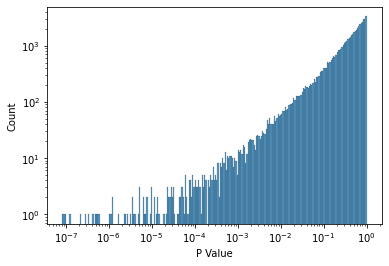

In [ ]:
sns.histplot(pvals, log_scale=(True, True))
plt.xlabel('P Value')

#Sites

In [ ]:
import pandas as pd
!pwd
%cd /home/chenant/rmats_covid/covid2/sig_exons_NEW

/home/chenant/long_covid/firsts
/home/chenant/rmats_covid/covid2/sig_exons_NEW


In [ ]:
mms_dfs = []
for i in ["SE", "RI", "MXE", "A3SS", "A5SS", "MXE"]:
  df = pd.read_table("mms/{}.txt".format(i))
  mms_dfs.append(df)
mms_exons = pd.concat(mms_dfs)

In [ ]:
ms_dfs = []
for i in ["SE", "RI", "MXE", "A3SS", "A5SS", "MXE"]:
  df = pd.read_table("ms/{}.txt".format(i))
  ms_dfs.append(df)
ms_exons = pd.concat(ms_dfs)

In [ ]:
mms_exons

,Unnamed: 0,ERR6745775,ERR6745776,ERR6745777,ERR6745778,ERR6745779,ERR6745780,ERR6745781,ERR6745782,ERR6745783,...,ERR6745824,ERR6745825,ERR6745826,ERR6745827,ERR6745828,ERR6745829,FDR,IncLevelDifference,Gene,rowID
0,chr21:32602271-32602367|-|32582415|32603160,0.880,1.000,1.000,0.830,0.907,0.888,1.000,0.836,0.888,...,0.753,0.916,1.000,0.753,0.810,1.000,0.00000,-0.061,AP000275.2,535
1,chr22:46269141-46269289|+|46268591|46272334,0.144,0.099,0.134,0.064,0.087,0.206,0.150,0.067,0.075,...,0.140,0.091,0.126,0.103,0.084,0.190,0.00031,0.071,TTC38,1051
2,chr22:39025069-39025349|+|39023014|39029362,0.727,0.942,1.000,1.000,1.000,1.000,0.944,0.863,0.957,...,0.750,0.854,0.841,1.000,1.000,0.871,0.00005,-0.051,AL022318.4,1544
3,chr22:39025556-39025671|+|39023014|39029362,0.762,0.895,1.000,1.000,1.000,1.000,0.931,0.773,0.919,...,0.665,0.831,0.784,1.000,1.000,0.718,0.00001,-0.062,AL022318.4,1545
4,chr22:23683724-23683867|-|23660000|23686830,0.000,0.807,1.000,0.826,1.000,1.000,1.000,0.754,1.000,...,1.000,1.000,1.000,1.000,0.760,1.000,0.00774,0.121,AP000347.2,2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,chr14:92482679-92482846:92486665-92486780|+|92...,0.170,0.181,0.204,0.024,0.231,0.235,0.290,0.138,0.542,...,0.240,0.502,0.163,0.124,0.020,0.163,0.00003,0.115,SLC24A4,36252
249,chr14:101786017-101786183:101856685-101856885|...,0.378,0.400,0.414,0.535,0.486,0.228,0.321,0.259,0.322,...,0.446,0.307,0.330,0.474,0.455,0.456,0.00000,-0.116,PPP2R5C,36324
250,chr14:101856685-101856885:101882160-101882271|...,0.373,0.380,0.362,0.517,0.463,0.168,0.322,0.241,0.323,...,0.420,0.257,0.315,0.448,0.437,0.433,0.00000,-0.111,PPP2R5C,36325
251,chr14:101856685-101856885:101882160-101882271|...,0.562,0.522,0.553,0.358,0.393,0.591,0.533,0.579,0.538,...,0.544,0.533,0.525,0.478,0.416,0.443,0.00001,0.099,PPP2R5C,36326


In [ ]:
mms_exons.columns

Index(['Unnamed: 0', 'ERR6745775', 'ERR6745776', 'ERR6745777', 'ERR6745778',
       'ERR6745779', 'ERR6745780', 'ERR6745781', 'ERR6745782', 'ERR6745783',
       'ERR6745784', 'ERR6745785', 'ERR6745786', 'ERR6745787', 'ERR6745788',
       'ERR6745789', 'ERR6745790', 'ERR6745791', 'ERR6745792', 'ERR6745793',
       'ERR6745794', 'ERR6745795', 'ERR6745796', 'ERR6745797', 'ERR6745798',
       'ERR6745799', 'ERR6745800', 'ERR6745801', 'ERR6745802', 'ERR6745803',
       'ERR6745804', 'ERR6745805', 'ERR6745806', 'ERR6745807', 'ERR6745808',
       'ERR6745809', 'ERR6745810', 'ERR6745811', 'ERR6745812', 'ERR6745813',
       'ERR6745814', 'ERR6745815', 'ERR6745816', 'ERR6745817', 'ERR6745818',
       'ERR6745819', 'ERR6745820', 'ERR6745821', 'ERR6745822', 'ERR6745823',
       'ERR6745824', 'ERR6745825', 'ERR6745826', 'ERR6745827', 'ERR6745828',
       'ERR6745829', 'FDR', 'IncLevelDifference', 'Gene', 'rowID'],
      dtype='object')

In [ ]:
X = mms_exons.merge(ms_exons, how = "inner", indicator = False, on = ['Unnamed: 0', 'ERR6745775', 'ERR6745776', 'ERR6745777', 'ERR6745778',
       'ERR6745779', 'ERR6745780', 'ERR6745781', 'ERR6745782', 'ERR6745783',
       'ERR6745784', 'ERR6745785', 'ERR6745786', 'ERR6745787', 'ERR6745788',
       'ERR6745789', 'ERR6745790', 'ERR6745791', 'ERR6745792', 'ERR6745793',
       'ERR6745794', 'ERR6745795', 'ERR6745796', 'ERR6745797', 'ERR6745798',
       'ERR6745799', 'ERR6745800', 'ERR6745801', 'ERR6745802', 'ERR6745803',
       'ERR6745804', 'ERR6745805', 'ERR6745806', 'ERR6745807', 'ERR6745808',
       'ERR6745809', 'ERR6745810', 'ERR6745811', 'ERR6745812', 'ERR6745813',
       'ERR6745814', 'ERR6745815', 'ERR6745816', 'ERR6745817', 'ERR6745818',
       'ERR6745819', 'ERR6745820', 'ERR6745821', 'ERR6745822', 'ERR6745823',
       'ERR6745824', 'ERR6745825', 'ERR6745826', 'ERR6745827', 'ERR6745828',
       'ERR6745829', 'Gene'])

In [ ]:
X = X.loc[:, ['Unnamed: 0', 'ERR6745775', 'ERR6745776', 'ERR6745777', 'ERR6745778',
       'ERR6745779', 'ERR6745780', 'ERR6745781', 'ERR6745782', 'ERR6745783',
       'ERR6745784', 'ERR6745785', 'ERR6745786', 'ERR6745787', 'ERR6745788',
       'ERR6745789', 'ERR6745790', 'ERR6745791', 'ERR6745792', 'ERR6745793',
       'ERR6745794', 'ERR6745795', 'ERR6745796', 'ERR6745797', 'ERR6745798',
       'ERR6745799', 'ERR6745800', 'ERR6745801', 'ERR6745802', 'ERR6745803',
       'ERR6745804', 'ERR6745805', 'ERR6745806', 'ERR6745807', 'ERR6745808',
       'ERR6745809', 'ERR6745810', 'ERR6745811', 'ERR6745812', 'ERR6745813',
       'ERR6745814', 'ERR6745815', 'ERR6745816', 'ERR6745817', 'ERR6745818',
       'ERR6745819', 'ERR6745820', 'ERR6745821', 'ERR6745822', 'ERR6745823',
       'ERR6745824', 'ERR6745825', 'ERR6745826', 'ERR6745827', 'ERR6745828',
       'ERR6745829']].set_index('Unnamed: 0').T
X = X.T.drop_duplicates().T
X

Unnamed: 0,chr21:32602271-32602367|-|32582415|32603160,chr22:39025556-39025671|+|39023014|39029362,chr19:49478962-49479047|+|49476566|49486014,chr19:49480551-49480620|+|49476566|49486014,chr19:41897945-41898113|+|41896482|41898441,chr19:34430575-34430659|+|34428570|34431860,chr19:19627753-19627969|-|19627284|19628091,chr19:14755653-14755844|-|14755127|14756237,chr19:14755653-14755877|-|14752526|14756237,chr19:14755653-14755877|-|14755127|14756237,...,chr11:67608395-67608478|+|67607324|67607076,chr2:127640069-127640145|-|127640269|127640895,chr3:47067069-47067118|-|47080800|47080915,chr14:88607242-88607363|+|88603060|88603045,chr14:91173288-91173439|+|91170201|91170186,chr11:95862271-95862366|-|95865439|95865600,chr11:62835694-62835841|-|62835918|62835960,chr14:20455913-20456101|+|20455773|20455703,chr14:95193848-95193919|-|95194214|95194535,chr14:96382246-96382505|+|96379788|96379755
ERR6745775,0.880,0.762,0.798,0.742,0.815,0.885,0.806,0.824,0.755,0.918,...,0.213,0.947,0.882,0.936,0.507,0.021,0.047,0.083,0.377,1.000
ERR6745776,1.000,0.895,1.000,1.000,0.893,0.945,0.869,0.892,0.854,0.944,...,0.158,0.935,0.965,0.829,1.000,0.105,0.039,0.041,0.911,0.353
ERR6745777,1.000,1.000,1.000,1.000,0.903,1.000,0.782,0.694,0.805,0.881,...,0.200,1.000,0.796,0.560,1.000,0.120,0.025,0.173,0.848,1.000
ERR6745778,0.830,1.000,1.000,1.000,0.894,1.000,0.927,0.870,0.810,0.944,...,0.089,0.970,0.980,0.833,0.472,0.000,0.135,0.000,0.889,1.000
ERR6745779,0.907,1.000,0.899,0.892,0.892,1.000,0.873,0.938,0.927,0.969,...,0.153,1.000,0.908,0.939,1.000,0.043,0.169,0.043,0.882,0.431
ERR6745780,0.888,1.000,0.781,0.634,0.770,0.839,0.776,0.654,0.429,0.800,...,0.166,0.867,0.878,0.901,0.528,0.059,0.080,0.068,0.540,0.974
ERR6745781,1.000,0.931,0.761,0.739,0.836,0.952,0.761,0.811,0.742,0.889,...,0.237,0.892,0.857,1.000,1.000,0.053,0.051,0.030,0.476,1.000
ERR6745782,0.836,0.773,1.000,1.000,0.767,0.911,0.596,0.789,0.739,0.841,...,0.324,0.857,0.793,0.916,1.000,0.101,0.057,0.017,0.322,1.000
ERR6745783,0.888,0.919,0.736,0.663,0.834,1.000,0.892,0.691,0.764,0.839,...,0.283,1.000,0.870,0.922,0.410,0.120,0.092,0.061,0.429,0.381
ERR6745784,0.946,1.000,0.865,0.787,0.803,0.941,0.609,0.548,0.632,0.741,...,0.272,1.000,0.824,0.784,1.000,0.086,0.067,0.036,0.474,1.000


In [ ]:
y = pd.read_csv("/home/chenant/rmats_covid/SraRunTable.txt")
y = y[["Run", "disease_staging"]]
y = y.set_index("Run")
y = y.loc[X.index]
y

,disease_staging
ERR6745775,moderate disease severity
ERR6745776,severe disease severity
ERR6745777,moderate disease severity
ERR6745778,severe disease severity
ERR6745779,severe disease severity
ERR6745780,mild disease severity
ERR6745781,mild disease severity
ERR6745782,mild disease severity
ERR6745783,mild disease severity
ERR6745784,mild disease severity


#Model

##Feature Selection

In [ ]:
import numpy as np
import pandas as pd
import random as rd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, validation_curve, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, classification_report, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import resample

from scipy.stats import zscore
from statistics import mean

#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [ ]:
X

Unnamed: 0,chr21:32602271-32602367|-|32582415|32603160,chr22:39025556-39025671|+|39023014|39029362,chr19:49478962-49479047|+|49476566|49486014,chr19:49480551-49480620|+|49476566|49486014,chr19:41897945-41898113|+|41896482|41898441,chr19:34430575-34430659|+|34428570|34431860,chr19:19627753-19627969|-|19627284|19628091,chr19:14755653-14755844|-|14755127|14756237,chr19:14755653-14755877|-|14752526|14756237,chr19:14755653-14755877|-|14755127|14756237,...,chr11:67608395-67608478|+|67607324|67607076,chr2:127640069-127640145|-|127640269|127640895,chr3:47067069-47067118|-|47080800|47080915,chr14:88607242-88607363|+|88603060|88603045,chr14:91173288-91173439|+|91170201|91170186,chr11:95862271-95862366|-|95865439|95865600,chr11:62835694-62835841|-|62835918|62835960,chr14:20455913-20456101|+|20455773|20455703,chr14:95193848-95193919|-|95194214|95194535,chr14:96382246-96382505|+|96379788|96379755
ERR6745775,0.880,0.762,0.798,0.742,0.815,0.885,0.806,0.824,0.755,0.918,...,0.213,0.947,0.882,0.936,0.507,0.021,0.047,0.083,0.377,1.000
ERR6745776,1.000,0.895,1.000,1.000,0.893,0.945,0.869,0.892,0.854,0.944,...,0.158,0.935,0.965,0.829,1.000,0.105,0.039,0.041,0.911,0.353
ERR6745777,1.000,1.000,1.000,1.000,0.903,1.000,0.782,0.694,0.805,0.881,...,0.200,1.000,0.796,0.560,1.000,0.120,0.025,0.173,0.848,1.000
ERR6745778,0.830,1.000,1.000,1.000,0.894,1.000,0.927,0.870,0.810,0.944,...,0.089,0.970,0.980,0.833,0.472,0.000,0.135,0.000,0.889,1.000
ERR6745779,0.907,1.000,0.899,0.892,0.892,1.000,0.873,0.938,0.927,0.969,...,0.153,1.000,0.908,0.939,1.000,0.043,0.169,0.043,0.882,0.431
ERR6745780,0.888,1.000,0.781,0.634,0.770,0.839,0.776,0.654,0.429,0.800,...,0.166,0.867,0.878,0.901,0.528,0.059,0.080,0.068,0.540,0.974
ERR6745781,1.000,0.931,0.761,0.739,0.836,0.952,0.761,0.811,0.742,0.889,...,0.237,0.892,0.857,1.000,1.000,0.053,0.051,0.030,0.476,1.000
ERR6745782,0.836,0.773,1.000,1.000,0.767,0.911,0.596,0.789,0.739,0.841,...,0.324,0.857,0.793,0.916,1.000,0.101,0.057,0.017,0.322,1.000
ERR6745783,0.888,0.919,0.736,0.663,0.834,1.000,0.892,0.691,0.764,0.839,...,0.283,1.000,0.870,0.922,0.410,0.120,0.092,0.061,0.429,0.381
ERR6745784,0.946,1.000,0.865,0.787,0.803,0.941,0.609,0.548,0.632,0.741,...,0.272,1.000,0.824,0.784,1.000,0.086,0.067,0.036,0.474,1.000


In [ ]:
X_norm = X.apply(zscore)
X_norm

Unnamed: 0,chr21:32602271-32602367|-|32582415|32603160,chr22:39025556-39025671|+|39023014|39029362,chr19:49478962-49479047|+|49476566|49486014,chr19:49480551-49480620|+|49476566|49486014,chr19:41897945-41898113|+|41896482|41898441,chr19:34430575-34430659|+|34428570|34431860,chr19:19627753-19627969|-|19627284|19628091,chr19:14755653-14755844|-|14755127|14756237,chr19:14755653-14755877|-|14752526|14756237,chr19:14755653-14755877|-|14755127|14756237,...,chr11:67608395-67608478|+|67607324|67607076,chr2:127640069-127640145|-|127640269|127640895,chr3:47067069-47067118|-|47080800|47080915,chr14:88607242-88607363|+|88603060|88603045,chr14:91173288-91173439|+|91170201|91170186,chr11:95862271-95862366|-|95865439|95865600,chr11:62835694-62835841|-|62835918|62835960,chr14:20455913-20456101|+|20455773|20455703,chr14:95193848-95193919|-|95194214|95194535,chr14:96382246-96382505|+|96379788|96379755
ERR6745775,-0.002096,-1.433470,-0.839680,-0.821404,-0.018274,-0.475828,0.144162,0.347250,-0.216484,0.530274,...,-0.373747,0.245343,0.312899,0.234131,-0.907416,-1.112549,-0.504649,0.091543,-0.929395,0.495042
ERR6745776,1.062226,-0.068660,1.197186,1.208148,1.151838,0.274044,0.648219,0.932522,0.759307,0.960388,...,-1.083914,0.107416,1.507201,-0.777514,0.691530,0.372135,-0.686653,-0.567224,1.775890,-2.349010
ERR6745777,1.062226,1.008821,1.197186,1.208148,1.301853,0.961427,-0.047860,-0.771650,0.276340,-0.081812,...,-0.541605,0.854519,-0.924570,-3.320808,0.691530,0.637257,-1.005161,1.503187,1.456727,0.495042
ERR6745778,-0.445564,1.008821,1.197186,1.208148,1.166840,0.961427,1.112272,0.743169,0.325622,0.960388,...,-1.974850,0.509702,1.723038,-0.739695,-1.020931,-1.483720,1.497400,-1.210307,1.664436,0.495042
ERR6745779,0.237376,1.008821,0.178753,0.358568,1.136837,0.961427,0.680223,1.328440,1.478830,1.373959,...,-1.148474,0.854519,0.687018,0.262495,0.691530,-0.723703,2.270919,-0.535855,1.628974,-2.006141
ERR6745780,0.068858,1.008821,-1.011100,-1.670983,-0.693339,-1.050730,-0.095865,-1.115927,-3.429696,-1.421783,...,-0.980617,-0.674170,0.255342,-0.096781,-0.839306,-0.440906,0.246120,-0.143731,-0.103624,0.380752
ERR6745781,1.062226,0.300762,-1.212770,-0.845003,0.296756,0.361529,-0.215879,0.235360,-0.344618,0.050531,...,-0.063856,-0.386822,-0.046830,0.839227,0.691530,-0.546955,-0.413646,-0.739759,-0.427853,0.495042
ERR6745782,-0.392348,-1.320591,1.197186,1.208148,-0.738344,-0.150883,-1.536030,0.046008,-0.374188,-0.743526,...,1.059498,-0.789109,-0.967737,0.045038,0.691530,0.301436,-0.277143,-0.943663,-1.208029,0.495042
ERR6745783,0.068858,0.177621,-1.464857,-1.442855,0.266753,0.961427,0.832240,-0.797471,-0.127776,-0.776612,...,0.530101,0.854519,0.140229,0.101766,-1.222015,0.637257,0.519126,-0.253526,-0.665959,-2.225929
ERR6745784,0.583281,1.008821,-0.164086,-0.467412,-0.198292,0.224053,-1.432018,-2.028262,-1.428831,-2.397812,...,0.388068,0.854519,-0.521673,-1.202972,0.691530,0.036314,-0.049638,-0.645649,-0.437985,0.495042


In [ ]:
#### BOOTSTRAP SITES
y2 = y.copy()
le = LabelEncoder()
y2["disease_staging"] = le.fit_transform(y2["disease_staging"] == "severe disease severity")

def bootstrap(X, y2):
  sites = rd.choices(range(len(X.columns)), k=len(X.columns))

  while True:
    y3 = resample(y2, replace=True, n_samples=len(y2), stratify=y2["disease_staging"])

    X2 = X[X.columns[sites]]
    bs = X2.loc[y3.index]

    y3 = y3.values.ravel()

    #print(sum(trainY), "\t", sum(np.logical_not(trainY)))

    kfold = StratifiedKFold(n_splits=4, shuffle=False)
    params = {
        'C': [10**(i) for i in range(-5, 6)]
    }
    grid_search = GridSearchCV(estimator=LinearSVC(penalty='l1', loss = 'squared_hinge', dual = False, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)
    grid_search.fit(bs, y3)
    model = grid_search.best_estimator_
    #model.fit(trainX, trainY)

    removed = 0
    coefs = model.coef_[0]

    for i in range(len(coefs)):
      if (coefs[i] == 0): #why need to assert that i is in sites?? This is wrong
        sites.remove(list(X.columns).index(X2.columns[i]))
        removed += 1

    if removed == 0:
      break

  return sites

In [ ]:
#### DO NOT BOOTSTRAP SITES
y2 = y.copy()
le = LabelEncoder()
y2["disease_staging"] = le.fit_transform(y2["disease_staging"] == "severe disease severity")

def bootstrap(X, y2):
  sites = list(range(len(X.columns)))

  while True:
    y3 = resample(y2, replace=True, n_samples=len(y2), stratify=y2["disease_staging"])

    X2 = X[X.columns[sites]]
    bs = X2.loc[y3.index]

    y3 = y3.values.ravel()

    #print(sum(trainY), "\t", sum(np.logical_not(trainY)))

    kfold = StratifiedKFold(n_splits=4, shuffle=False)
    params = {
        'C': [10**(i) for i in range(-5, 6)]
    }
    grid_search = GridSearchCV(estimator=LinearSVC(penalty='l1', loss = 'squared_hinge', dual = False, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)
    grid_search.fit(bs, y3)
    model = grid_search.best_estimator_
    #model.fit(trainX, trainY)

    removed = 0
    coefs = model.coef_[0]

    for i in range(len(coefs)):
      if (coefs[i] == 0): #why need to assert that i is in sites?? This is wrong
        sites.remove(list(X.columns).index(X2.columns[i]))
        removed += 1

    if removed == 0:
      break

  return sites

In [ ]:
counts = {}
for i in range(1000):
  sites = bootstrap(X_norm, y2)
  for j in sites:
    if j in counts.keys():
      counts[j] += 1
    else:
      counts[j] = 1
  print("finished", i)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
finished 30
finished 31
finished 32
finished 33
finished 34
finished 35
finished 36
finished 37
finished 38
finished 39
finished 40
finished 41
finished 42
finished 43
finished 44
finished 45
finished 46
finished 47
finished 48
finished 49
finished 50
finished 51
finished 52
finished 53
finished 54
finished 55
finished 56
finished 57
finished 58
finished 59


/home/chenant/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/chenant/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/chenant/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


finished 60
finished 61
finished 62
finished 63
finished 64
finished 65


/home/chenant/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


finished 66
finished 67
finished 68
finished 69
finished 70
finished 71
finished 72
finished 73
finished 74
finished 75
finished 76
finished 77
finished 78
finished 79
finished 80
finished 81
finished 82
finished 83
finished 84
finished 85
finished 86
finished 87
finished 88
finished 89
finished 90
finished 91
finished 92
finished 93
finished 94
finished 95
finished 96
finished 97
finished 98
finished 99
finished 100
finished 101
finished 102
finished 103
finished 104
finished 105
finished 106
finished 107
finished 108
finished 109
finished 110
finished 111
finished 112
finished 113
finished 114
finished 115
finished 116
finished 117
finished 118
finished 119
finished 120
finished 121
finished 122
finished 123
finished 124
finished 125
finished 126
finished 127
finished 128
finished 129
finished 130
finished 131
finished 132
finished 133
finished 134
finished 135
finished 136
finished 137
finished 138
finished 139
finished 140
finished 141
finished 142
finished 143
finished 144
finishe

In [ ]:
keys = counts.keys()
values = [counts[i] for i in keys]
counts_df = pd.DataFrame({"Values": values}, index=keys)
counts_df.sort_values(by="Values", ascending=False)
counts2 = sorted(counts.items(), key=lambda x: x[1])
print(counts2)
counts2 = [X.columns[i[0]] for i in counts2]
counts2

[(345, 1), (235, 1), (325, 1), (395, 1), (252, 1), (334, 1), (97, 1), (288, 1), (198, 1), (24, 1), (113, 1), (390, 1), (253, 1), (353, 1), (1, 1), (274, 1), (197, 1), (188, 1), (356, 1), (360, 1), (210, 1), (296, 1), (195, 1), (401, 1), (6, 1), (349, 1), (357, 1), (129, 1), (170, 1), (14, 1), (13, 1), (32, 1), (255, 1), (379, 1), (121, 1), (214, 1), (215, 1), (260, 1), (336, 1), (213, 1), (378, 1), (233, 1), (69, 1), (42, 1), (321, 2), (358, 2), (359, 2), (126, 2), (354, 2), (54, 2), (70, 2), (234, 2), (93, 2), (102, 2), (366, 2), (402, 2), (131, 2), (240, 2), (160, 2), (40, 2), (33, 2), (347, 2), (82, 2), (275, 2), (259, 2), (101, 2), (133, 2), (243, 2), (137, 2), (187, 2), (50, 2), (181, 2), (365, 2), (285, 2), (72, 2), (294, 2), (295, 2), (11, 2), (389, 2), (293, 2), (87, 2), (144, 3), (178, 3), (374, 3), (312, 3), (134, 3), (224, 3), (230, 3), (10, 3), (192, 3), (166, 3), (17, 3), (361, 3), (3, 3), (63, 3), (286, 3), (26, 3), (140, 3), (56, 3), (71, 3), (344, 3), (278, 3), (35, 3),

['chr9:113583449-113584427:113591332-113591397|+|113536918|113594429',
 'chr22:38488115-38492055|-|38487878|38492115',
 'chr17:35106987-35107122:35107365-35107447|-|35106481|35116858',
 'chr2:127640069-127640145|-|127640269|127640895',
 'chr5:119492124-119493817|+|119492099|119493946',
 'chr11:72713175-72713243:72714151-72714321|-|72712568|72721849',
 'chr1:110049459-110049560|+|110047869|110050342',
 'chr12:57231000-57231712|+|57230802|57231913',
 'chr11:66643449-66644140|+|66640123|66646026',
 'chr16:67992509-67992636|-|67992193|68000447',
 'chr14:23089981-23090101|-|23081836|23090521',
 'chr12:47210639-47210761|-|47216164|47216383',
 'chr3:44400587-44401202|+|44400354|44401334',
 'chr2:198083757-198086232:198088857-198089061|+|198002008|198101284',
 'chr22:39025556-39025671|+|39023014|39029362',
 'chr1:25563791-25565172|+|25563660|25565207',
 'chr10:110918120-110918213|-|110901612|110919120',
 'chr8:94756035-94756159|+|94739790|94761699',
 'chr10:101582762-101582891:101587245-101587

In [ ]:
len(counts2)

336

In [ ]:
counts2=['chr9:113583449-113584427:113591332-113591397|+|113536918|113594429',
 'chr22:38488115-38492055|-|38487878|38492115',
 'chr17:35106987-35107122:35107365-35107447|-|35106481|35116858',
 'chr2:127640069-127640145|-|127640269|127640895',
 'chr5:119492124-119493817|+|119492099|119493946',
 'chr11:72713175-72713243:72714151-72714321|-|72712568|72721849',
 'chr1:110049459-110049560|+|110047869|110050342',
 'chr12:57231000-57231712|+|57230802|57231913',
 'chr11:66643449-66644140|+|66640123|66646026',
 'chr16:67992509-67992636|-|67992193|68000447',
 'chr14:23089981-23090101|-|23081836|23090521',
 'chr12:47210639-47210761|-|47216164|47216383',
 'chr3:44400587-44401202|+|44400354|44401334',
 'chr2:198083757-198086232:198088857-198089061|+|198002008|198101284',
 'chr22:39025556-39025671|+|39023014|39029362',
 'chr1:25563791-25565172|+|25563660|25565207',
 'chr10:110918120-110918213|-|110901612|110919120',
 'chr8:94756035-94756159|+|94739790|94761699',
 'chr10:101582762-101582891:101587245-101587406|-|101580416|101588203',
 'chr19:41619669-41619711:41620210-41620242|-|41619395|41620574',
 'chr4:102882770-102882873|+|102869187|102885215',
 'chr22:39947092-39947184:39960054-39960174|+|39901330|39965989',
 'chr17:67875555-67875744|+|67875020|67886127',
 'chr14:20455913-20456101|+|20455773|20455703',
 'chr19:19627753-19627969|-|19627284|19628091',
 'chr7:100355142-100355240:100356393-100356883|+|100354012|100358219',
 'chr10:63217206-63217331:63264650-63264764|-|63215696|63380317',
 'chr4:7009876-7009948|+|7006726|7010652',
 'chr7:111532517-111532585|-|111521449|111561850',
 'chr20:45909515-45909671|-|45907904|45909941',
 'chr20:49165996-49166285|-|49159146|49174194',
 'chr16:1744977-1745103|+|1743476|1747028',
 'chr21:42288073-42288210|+|42287888|42288312',
 'chr22:21710486-21710908|-|21704125|21703882',
 'chr17:60073745-60074159|-|60073279|60076129',
 'chr12:49106510-49106746|-|49105957|49106960',
 'chr12:49106544-49106746|-|49105957|49106960',
 'chr1:109280916-109281107|-|109280776|109281251',
 'chr2:161179613-161179761:161223914-161223991|+|161137063|161224630',
 'chr6:26462796-26462897|+|26459828|26463243',
 'chr1:155215562-155215651|-|155215400|155215162',
 'chr14:74299547-74299675|-|74298069|74302874',
 'chr3:41754360-41754488|-|41717861|41789660',
 'chr17:16431783-16431850|+|16428982|16433573',
 'chr1:3773062-3773181:3775298-3775483|+|3772841|3775794',
 'chr11:72049418-72049539:72068495-72068617|-|72035975|72069841',
 'chr14:92615406-92615479:92641237-92641329|+|92577477|92651581',
 'chr14:100374135-100374244|-|100369258|100376259',
 'chr3:108050577-108050602:108051938-108051970|-|108049651|108057476',
 'chr8:24313387-24313580|+|24311437|24320235',
 'chr3:41915976-41916052|-|41912899|41918456',
 'chr14:74300149-74300268|-|74298069|74302874',
 'chr12:106307281-106307370|+|106303254|106311040',
 'chr16:11435661-11435879|-|11425433|11446549',
 'chr19:13758867-13759010|+|13759099|13759110',
 'chr14:95193848-95193919|-|95194214|95194535',
 'chr1:174877391-174877605|+|174874506|174957456',
 'chr19:11507850-11507990|-|11507701|11508048',
 'chr7:65979833-65979911|-|65976202|65980223',
 'chr15:33088798-33088974|-|33065074|33153047',
 'chr16:1533933-1534555|+|1528796|1541920',
 'chr14:88601923-88602083:88602827-88603045|+|88596808|88607242',
 'chr6:152130719-152130778|-|152122676|152132121',
 'chr12:57489345-57489454|+|57489266|57489558',
 'chr1:1628399-1628488|+|1628272|1628722',
 'chr1:39852730-39852876|-|39850261|39853969',
 'chr2:68513079-68513227|+|68502903|68513547',
 'chr20:63941043-63941109|-|63940949|63941208',
 'chr1:77859313-77859386|+|77859056|77860039',
 'chr17:78205945-78206050|+|78202751|78206910',
 'chr5:150037399-150037527|+|150032603|150040747',
 'chr11:64773429-64773505|-|64770408|64776497',
 'chr19:41577199-41577559|+|41579269|41579352',
 'chr11:836442-836768|+|836250|836843',
 'chr10:100490007-100490322|-|100489761|100490705',
 'chr14:95193919-95194535|-|95193848|95194596',
 'chr22:39947092-39947184:39955818-39955910|+|39901330|39960054',
 'chr19:11507701-11507729|-|11507562|11507990',
 'chr17:16440184-16440253|+|16439703|16439414',
 'chr14:21087105-21087319|+|21087000|21087463',
 'chr5:39125997-39126135|-|39124278|39127740',
 'chr12:79805591-79805768|-|79798584|79806165',
 'chr9:5944870-5944960|-|5929159|5968018',
 'chr4:139073453-139073567|-|139072039|139072003',
 'chr1:198692346-198692373:198699563-198699704|+|198639341|198702386',
 'chr2:74142271-74142360|-|74135658|74145188',
 'chr12:130795994-130796120|-|130791977|130798524',
 'chr14:30605504-30605812|+|30602131|30607887',
 'chr19:14397076-14397223|+|14396473|14397657',
 'chr9:33956078-33956146|-|33948587|33960825',
 'chr7:102543524-102543661|-|102541662|102566996',
 'chr18:54283742-54283815|+|54283015|54283921',
 'chr14:50756491-50758630:50759856-50760359|-|50754867|50761789',
 'chr19:49480551-49480620|+|49476566|49486014',
 'chr6:26427870-26428107|+|26426523|26428642',
 'chr17:63710614-63710727|-|63710490|63710836',
 'chr16:67992949-67993257|-|67992193|68000447',
 'chr2:121650300-121650381|+|121649911|121650467',
 'chr4:144002570-144002694|-|144001283|144008391',
 'chr1:9691466-9691571|+|9651802|9710423',
 'chr9:113536795-113536918:113583449-113584427|+|113529264|113591332',
 'chr9:136367257-136367636|-|136367215|136367976',
 'chr15:85662387-85662453|+|85658590|85664562',
 'chr3:48469360-48469573:48469727-48469843|-|48469186|48473009',
 'chrX:65528259-65528369|-|65525050|65529211',
 'chr7:66476258-66476327|-|66467719|66479008',
 'chr10:28595732-28596041|+|28590832|28608185',
 'chr2:239189832-239190077:239236592-239236664|-|239176563|239352677',
 'chr16:15651930-15652050|+|15651584|15664735',
 'chr22:50783038-50783286|-|50782351|50783500',
 'chr1:1626999-1627073|+|1626836|1627207',
 'chr1:213232122-213232255|+|213176492|213240701',
 'chr19:54206724-54207397|+|54206552|54207647',
 'chr6:98917373-98917719|-|98905670|98926476',
 'chr1:198696711-198696909|+|198692373|198699563',
 'chr17:39906960-39906987:39909755-39909924|-|39906271|39912325',
 'chr22:39947092-39947184:39965989-39966158|+|39901330|39968041',
 'chr16:67992063-67992193|-|67991184|68000447',
 'chr6:44230046-44230346|+|44229906|44230481',
 'chr5:154834624-154834728|-|154823592|154834842',
 'chr7:102667089-102667264|-|102666163|102668914',
 'chr16:3129247-3129653:3131746-3132103|-|3116519|3132849',
 'chr1:78628950-78628999:78629719-78629915|+|78620571|78635336',
 'chr7:124870910-124871041|-|124863640|124892265',
 'chrX:111721602-111721711|+|111720170|111722792',
 'chrX:155545095-155545277|-|155524632|155612791',
 'chr7:30463608-30463698|-|30460041|30478605',
 'chr1:202966109-202966527|-|202965886|202966600',
 'chr14:100374135-100374220|-|100369258|100375282',
 'chr11:69054032-69054097|+|69049106|69062883',
 'chr6:30021666-30021761:30034907-30035110|-|30009831|30035915',
 'chr5:50667084-50667186:50750150-50750188|+|50666069|50759642',
 'chr17:35021370-35021781|-|35017606|35026373',
 'chr13:45341512-45341614|+|45344328|45344378',
 'chr17:4536174-4536262|+|4536075|4536426',
 'chr10:102727674-102727791|+|102727157|102728430',
 'chr10:71351561-71351788|+|71323054|71356080',
 'chr12:122860077-122860147|+|122860046|122860210',
 'chr7:39779270-39779385|+|39771091|39780502',
 'chr2:241096392-241096438|-|241090044|241097242',
 'chr17:60066208-60066386|-|60067430|60067433',
 'chr14:100380909-100381746|+|100376495|100468020',
 'chr7:102543524-102543697|-|102541662|102566996',
 'chr1:198696711-198696909:198699563-198699704|+|198692373|198703297',
 'chr14:91173288-91173439|+|91170201|91170186',
 'chr1:198696711-198696909:198699563-198699704|+|198692373|198704471',
 'chr19:34430575-34430659|+|34428570|34431860',
 'chr17:35106987-35107122|-|35106481|35118500',
 'chr20:1895438-1895526:1915098-1915455|+|1894517|1921394',
 'chr8:143590607-143590735|-|143590081|143592646',
 'chr12:120579597-120579773|-|120579513|120579923',
 'chr11:120429711-120429831|+|120429517|120431770',
 'chr21:39250795-39250889|-|39255644|39255664',
 'chr19:14441142-14441443:14443469-14443621|+|14433542|14446425',
 'chr21:32602271-32602367|-|32582415|32603160',
 'chr13:94619149-94619330|+|94612390|94619467',
 'chr20:32456117-32456395:32474600-32474742|-|32453761|32511346',
 'chr7:100355142-100355240|+|100356393|100356749',
 'chr19:51417081-51417465|-|51416950|51416776',
 'chr14:101856685-101856885:101882160-101882271|+|101786183|101883256',
 'chr11:67608395-67608478|+|67607324|67607076',
 'chr12:56475682-56475944|-|56475623|56475977',
 'chr1:114397860-114397939|-|114397607|114397990',
 'chr7:102544705-102544776|-|102541662|102566996',
 'chr3:152335110-152335230|+|152269778|152414940',
 'chr3:47067069-47067118|-|47080800|47080915',
 'chr1:228271924-228272221|+|228264391|228273271',
 'chr2:43560233-43560385|-|43552339|43566697',
 'chr15:75877960-75878021|+|75873568|75879097',
 'chr10:131934893-131935006|+|131934555|131940030',
 'chr1:198699563-198699704:198702386-198702530|+|198692373|198703297',
 'chr11:72823543-72823797|+|72822543|72824059',
 'chr2:33534322-33534400|+|33539093|33539096',
 'chr9:113582071-113582242|+|113536918|113583449',
 'chr17:46094559-46094701:46170854-46172232|-|46082542|46223670',
 'chr11:85650248-85650341|+|85648089|85654062',
 'chr19:49489912-49490231|+|49489849|49490297',
 'chr6:34341861-34341972:34418368-34418424|-|34295685|34421729',
 'chrX:150816278-150816455|-|150816078|150831230',
 'chr1:235176747-235176903|-|235175399|235177799',
 'chr12:57746256-57746592|+|57746175|57746720',
 'chr14:24270998-24271112|-|24270836|24271169',
 'chr7:6733398-6733527|+|6731955|6735304',
 'chr2:174597600-174597858|-|174585611|174625820',
 'chr9:125220538-125220700:125227909-125228059|+|125207721|125232595',
 'chr5:67004951-67005085|+|66917018|67054403',
 'chr2:8299675-8299793|-|8297233|8296943',
 'chr6:41070075-41070134|-|41052363|41071131',
 'chr1:31348828-31348974|+|31346818|31346740',
 'chr16:31723257-31723353|+|31713435|31753765',
 'chr3:38002395-38002575|+|38001860|38004254',
 'chr12:121228866-121228962|+|121228724|121229099',
 'chr3:184245467-184245615|-|184248744|184248781',
 'chr14:50756491-50758630|-|50754867|50759856',
 'chr19:57820493-57820549|+|57819945|57856103',
 'chr17:4067162-4067242|-|4070683|4070810',
 'chr12:8921600-8921750|+|8921065|8922632',
 'chr12:106959287-106959385|+|106957149|106967110',
 'chr7:65979726-65979911|-|65976202|65980223',
 'chr2:97204190-97204263|+|97204096|97209680',
 'chr3:4980031-4980300|+|4979961|4980408',
 'chr5:67004951-67005085|+|66899982|67054403',
 'chr10:5709529-5709663|+|5685175|5712393',
 'chr1:1628488-1628722|+|1629033|1629132',
 'chr14:101786017-101786183:101856685-101856885|+|101762970|101882160',
 'chr19:19656766-19656846|-|19656659|19656916',
 'chr12:4607326-4607387|+|4605086|4610154',
 'chr7:87345233-87345304|-|87345042|87345515',
 'chrX:154039791-154039903|-|154032557|154092183',
 'chr17:73227164-73227264|-|73209768|73232085',
 'chr10:110132304-110132400|+|110130486|110133325',
 'chr15:40814070-40814147|+|40813942|40814569',
 'chr4:70825431-70826123|-|70825295|70826245',
 'chr16:725145-725236|-|725077|725293',
 'chr16:4343482-4343594|-|4343291|4345785',
 'chr1:6628498-6628691|+|6630287|6630290',
 'chr19:10160063-10160383|-|10160017|10160418',
 'chr12:121232676-121232996|+|121232610|121233092',
 'chr1:11745987-11746223|+|11745837|11747439',
 'chr1:206912928-206913042|-|206910340|206921817',
 'chr11:72823765-72823797|+|72822543|72824059',
 'chr19:49478962-49479047|+|49476566|49486014',
 'chr15:57263111-57263274|+|57273029|57273032',
 'chr2:174597600-174597858|-|174585611|174629665',
 'chr8:143590607-143590738|-|143590081|143592646',
 'chr17:37520178-37520214|-|37519071|37520537',
 'chr14:23562066-23562287|-|23561961|23562415',
 'chr4:667855-668006|+|666614|670045',
 'chr1:15946934-15947022|-|15946294|15948290',
 'chr7:30579005-30579128:30584710-30584808|-|30568989|30585329',
 'chr14:89280949-89281014:89411933-89412490|-|89190449|89619027',
 'chr7:23521840-23522120|-|23521706|23522432',
 'chr9:137352065-137352201|-|137351528|137352619',
 'chr8:144389262-144389336|+|144383230|144390670',
 'chr7:65979398-65979541|-|65976202|65980223',
 'chr16:67992949-67993257|-|67992193|67999374',
 'chr1:235181070-235181184|-|235177913|235181584',
 'chr6:108561085-108561829:108663454-108664889|+|108560015|108679826',
 'chr9:113565514-113565730|+|113536918|113583449',
 'chr5:39208863-39208964|-|39202987|39274402',
 'chr1:198702386-198702530|+|198699704|198703297',
 'chr13:52018912-52019143|+|52012462|52024005',
 'chr6:158986279-158986421|-|158982688|158993838',
 'chr7:100355142-100355240:100356749-100356938|+|100354012|100358219',
 'chr10:100260217-100260319:100260965-100261044|-|100253539|100261978',
 'chrX:49178179-49178271|-|49177992|49178475',
 'chr19:14755653-14755844|-|14755127|14756237',
 'chr11:71982760-71982915|+|71960891|71990596',
 'chr2:85600344-85600412|-|85600018|85601020',
 'chr16:31706420-31706454|+|31706034|31706890',
 'chr2:183159652-183161053|+|183159487|183161680',
 'chr9:121573-121960|-|121088|122090',
 'chr9:136831861-136832261|+|136831720|136832370',
 'chr11:71987003-71987111|+|71960891|71990596',
 'chr22:49794033-49794294|-|49787887|49787494',
 'chr1:6463071-6463127|-|6462970|6462956',
 'chr6:41940369-41940585|-|41937394|42048500',
 'chr12:98544229-98544349|+|98537572|98544950',
 'chr2:40174824-40174842|-|40164984|40428472',
 'chr1:149607456-149607554|+|149606419|149646598',
 'chr22:24432620-24432726|+|24427726|24433130',
 'chr5:150391657-150391956|+|150391543|150392176',
 'chr15:101291961-101292040|-|101287702|101295096',
 'chr2:190655976-190656153|+|190649360|190659157',
 'chr7:30498802-30498938:30500535-30500681|-|30497235|30524366',
 'chr12:122975810-122975867|+|122975383|122976653',
 'chr10:68756272-68756483|+|68755536|68757293',
 'chr11:65046188-65046362|-|65046114|65047646',
 'chr3:105681610-105681723|-|105680991|105681818',
 'chr13:48522307-48522403|-|48515741|48524658',
 'chr3:170145422-170145521|-|170136665|170149085',
 'chr19:49490231-49490297|+|49490090|49489912',
 'chr1:20997600-20997633:21001198-21001312|-|20981227|21002712',
 'chr12:121444536-121445274|-|121444449|121445418',
 'chr1:180281305-180281386:180288269-180288517|-|180275412|180314691',
 'chr20:32703458-32704022|-|32702702|32704071',
 'chr12:95993771-95993838|-|95993488|95993925',
 'chr18:55229076-55232508|-|55228846|55232671',
 'chr11:71962151-71962289|+|71960891|71982760',
 'chr1:16625774-16626005|-|16620038|16620024',
 'chr11:70382087-70382158|+|70378195|70383002',
 'chr3:121668313-121668508|-|121668158|121669196',
 'chr14:96382246-96382505|+|96379788|96379755',
 'chr2:69988741-69988838|-|69975635|69996685',
 'chr20:37067232-37067297|-|37067121|37067985',
 'chr15:75028246-75028453|+|75023626|75043440',
 'chr6:36753033-36753095|-|36748267|36756244',
 'chr1:16477074-16478254|-|16476929|16478437',
 'chr2:201272897-201272942:201274888-201274953|+|201272776|201276826',
 'chr2:85350039-85350241|-|85349581|85350779',
 'chr1:15504610-15504758|-|15495452|15518109',
 'chr6:29630457-29630643|-|29629247|29629107',
 'chr16:787555-787744|-|787477|788255',
 'chr5:177041777-177041870:177044388-177044533|+|177041229|177050702',
 'chr15:50432337-50432499|+|50424514|50439008',
 'chr20:63945975-63946160|-|63945804|63946267',
 'chr12:122860523-122860678|+|122860422|122860784',
 'chr2:241089979-241090044:241094276-241094429|-|241089365|241097242',
 'chr7:134658347-134658668|+|134646937|134661446',
 'chr1:159857966-159858089|-|159857931|159858291',
 'chr19:14755653-14755877|-|14755127|14756237',
 'chr11:129893292-129893385|-|129892870|129894358',
 'chr7:90709815-90709957|+|90608575|90726566',
 'chr2:183151507-183151649|+|183133623|183157443',
 'chr8:133475718-133476074|-|133466090|133499134',
 'chr16:67991837-67991979:67992949-67993257|-|67991184|67999374',
 'chr22:44702491-44702608:44714590-44714671|+|44668805|44725243',
 'chr2:20739970-20740205|-|20701652|20774809',
 'chr3:152335110-152335230|+|152269092|152445281',
 'chr16:3025823-3025923|+|3025707|3026288',
 'chr18:69946733-69947069|-|69896045|69961591',
 'chr17:9981803-9981884:10019776-10019897|-|9969762|10036433',
 'chr17:63634708-63634801|+|63632802|63646033',
 'chr3:33563963-33563966|-|33560971|33570726',
 'chr12:116985205-116985402|+|116964854|116988662',
 'chr20:37382618-37382786|+|37365277|37384149',
 'chr1:217610888-217611071|-|217610400|217614140',
 'chr7:102541092-102541303:102541500-102541662|-|102540091|102566996',
 'chr11:62835694-62835841|-|62835918|62835960',
 'chr7:36690096-36690180|-|36674009|36724021',
 'chr19:806407-806556|+|797505|808359',
 'chr16:81740263-81740379|+|81739385|81755869',
 'chr14:45250030-45250138|-|45247377|45253034',
 'chr20:2657372-2657488|+|2657218|2657928',
 'chr20:3213257-3213383|+|3209617|3213984',
 'chr6:7176654-7176773:7181123-7182082|+|7108702|7187433',
 'chr5:113526585-113526785|+|113515362|113532878',
 'chr3:48924717-48924839:48944981-48945181|+|48922811|48961611',
 'chr3:170145422-170145521:170149085-170149244|-|170136665|170171389',
 'chr7:48099669-48099787|+|48094827|48106872',
 'chr1:148435145-148435354|-|148379554|148459601',
 'chr14:101856685-101856885:101882160-101882271|+|101810036|101883256',
 'chr16:70515867-70516040|-|70512432|70517625',
 'chr12:3641731-3641838|-|3638457|3648541',
 'chr11:406875-406993|-|406538|407061',
 'chr6:18187791-18188002|+|18185810|18197056']

In [ ]:
rocs = []
X2 = X_norm.copy()[counts2]

finished = 0

y3 = y2.values.ravel()
trainX, testX, trainY, testY = train_test_split(X2, y3, test_size=0.2, stratify=y3)
kfold = StratifiedKFold(n_splits=4, shuffle=False)
params = {
  'C': [10**(j) for j in range(-5, 6)],
}
grid_search = GridSearchCV(estimator=LinearSVC(penalty='l2', loss = 'hinge', dual = True, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)
grid_search.fit(trainX, trainY)
C = grid_search.best_params_['C']

for i in counts2:
  print(X2.shape)
  estimator = LinearSVC(penalty='l2', loss = 'hinge', dual = True, C=C, max_iter=1000000)
  cv_result = cross_validate(estimator, X2, y3, cv=kfold, scoring='balanced_accuracy', n_jobs=-1)

  rocs.append(mean(cv_result["test_score"]))

  X2 = X2.drop(columns=i)

  finished += 1
  print("finished", finished)

(55, 336)
finished 1
(55, 335)
finished 2
(55, 334)
finished 3
(55, 333)
finished 4
(55, 332)
finished 5
(55, 331)
finished 6
(55, 330)
finished 7
(55, 329)
finished 8
(55, 328)
finished 9
(55, 327)
finished 10
(55, 326)
finished 11
(55, 325)
finished 12
(55, 324)
finished 13
(55, 323)
finished 14
(55, 322)
finished 15
(55, 321)
finished 16
(55, 320)
finished 17
(55, 319)
finished 18
(55, 318)
finished 19
(55, 317)
finished 20
(55, 316)
finished 21
(55, 315)
finished 22
(55, 314)
finished 23
(55, 313)
finished 24
(55, 312)
finished 25
(55, 311)
finished 26
(55, 310)
finished 27
(55, 309)
finished 28
(55, 308)
finished 29
(55, 307)
finished 30
(55, 306)
finished 31
(55, 305)
finished 32
(55, 304)
finished 33
(55, 303)
finished 34
(55, 302)
finished 35
(55, 301)
finished 36
(55, 300)
finished 37
(55, 299)
finished 38
(55, 298)
finished 39
(55, 297)
finished 40
(55, 296)
finished 41
(55, 295)
finished 42
(55, 294)
finished 43
(55, 293)
finished 44
(55, 292)
finished 45
(55, 291)
finished 

In [ ]:
C

1e-05

In [ ]:
###DO NOT TRAIN HYPERPARAMETER ON EVERYTHING

rocs = []
X2 = X_norm.copy()[counts2]

finished = 0

y2 = y.copy()
le = LabelEncoder()
y2["disease_staging"] = le.fit_transform(y2["disease_staging"] == "severe disease severity")
y3 = y2.values.ravel()
trainX, testX, trainY, testY = train_test_split(X2, y3, test_size=0.75, stratify=y3)
kfold1 = StratifiedKFold(n_splits=2, shuffle=False)
kfold2 = StratifiedKFold(n_splits=2, shuffle=False)
params = {
  'C': [10**(j) for j in range(-5, 6)],
}
grid_search = GridSearchCV(estimator=LinearSVC(penalty='l2', loss = 'hinge', dual = True, max_iter=1000000), param_grid=params, cv=kfold1, scoring="roc_auc", n_jobs = -1)
grid_search.fit(trainX, trainY)
C = grid_search.best_params_['C']

for i in counts2:
  print(X2.shape)
  estimator = LinearSVC(penalty='l2', loss = 'hinge', dual = True, C=C, max_iter=1000000)
  cv_result = cross_validate(estimator, testX, testY, cv=kfold2, scoring='f1', n_jobs=-1)

  rocs.append(mean(cv_result["test_score"]))

  testX = testX.drop(columns=i)

  finished += 1
  print("finished", finished)

(55, 336)
finished 1
(55, 336)
finished 2
(55, 336)
finished 3
(55, 336)
finished 4
(55, 336)
finished 5
(55, 336)
finished 6
(55, 336)
finished 7
(55, 336)
finished 8
(55, 336)
finished 9
(55, 336)
finished 10
(55, 336)
finished 11
(55, 336)
finished 12
(55, 336)
finished 13
(55, 336)
finished 14
(55, 336)
finished 15
(55, 336)
finished 16
(55, 336)
finished 17
(55, 336)
finished 18
(55, 336)
finished 19
(55, 336)
finished 20
(55, 336)
finished 21
(55, 336)
finished 22
(55, 336)
finished 23
(55, 336)
finished 24
(55, 336)
finished 25
(55, 336)
finished 26
(55, 336)
finished 27
(55, 336)
finished 28
(55, 336)
finished 29
(55, 336)
finished 30
(55, 336)
finished 31
(55, 336)
finished 32
(55, 336)
finished 33
(55, 336)
finished 34
(55, 336)
finished 35
(55, 336)
finished 36
(55, 336)
finished 37
(55, 336)
finished 38
(55, 336)
finished 39
(55, 336)
finished 40
(55, 336)
finished 41
(55, 336)
finished 42
(55, 336)
finished 43
(55, 336)
finished 44
(55, 336)
finished 45
(55, 336)
finished 

In [ ]:
###IF L1 instead of L2
rocs = []
X2 = X_norm.copy()[counts2]

finished = 0

y3 = y2.values.ravel()
trainX, testX, trainY, testY = train_test_split(X2, y3, test_size=0.2, stratify=y3)
kfold = StratifiedKFold(n_splits=4, shuffle=False)
params = {
  'C': [10**(j) for j in range(-5, 6)],
}
grid_search = GridSearchCV(estimator=LinearSVC(penalty='l1', loss="squared_hinge", dual = False, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)
grid_search.fit(trainX, trainY)
C = grid_search.best_params_['C']

for i in counts2:
  print(X2.shape)
  estimator = LinearSVC(penalty='l1', loss="squared_hinge", dual = False, C=C, max_iter=1000000)
  cv_result = cross_validate(estimator, X2, y3, cv=kfold, scoring='balanced_accuracy', n_jobs=-1)

  rocs.append(mean(cv_result["test_score"]))

  X2 = X2.drop(columns=i)

  finished += 1
  print("finished", finished)


'''
#### DO NOT BOOTSTRAP SITES
y2 = y.copy()
le = LabelEncoder()
y2["disease_staging"] = le.fit_transform(y2["disease_staging"] == "severe disease severity")

def bootstrap(X, y2):
  sites = list(range(len(X.columns)))

  while True:
    y3 = resample(y2, replace=True, n_samples=len(y2), stratify=y2["disease_staging"])

    X2 = X[X.columns[sites]]
    bs = X2.loc[y3.index]

    y3 = y3.values.ravel()

    #print(sum(trainY), "\t", sum(np.logical_not(trainY)))

    kfold = StratifiedKFold(n_splits=4, shuffle=False)
    params = {
        'C': [10**(i) for i in range(-5, 6)]
    }
    grid_search = GridSearchCV(estimator=LinearSVC(penalty='l1', loss = 'squared_hinge', dual = False, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)
    grid_search.fit(bs, y3)
    model = grid_search.best_estimator_
    #model.fit(trainX, trainY)

    removed = 0
    coefs = model.coef_[0]

    for i in range(len(coefs)):
      if (coefs[i] == 0): #why need to assert that i is in sites?? This is wrong
        sites.remove(list(X.columns).index(X2.columns[i]))
        removed += 1

    if removed == 0:
      break

  return sites
'''

(55, 336)
finished 1
(55, 335)
finished 2
(55, 334)
finished 3
(55, 333)
finished 4
(55, 332)
finished 5
(55, 331)
finished 6
(55, 330)
finished 7
(55, 329)
finished 8
(55, 328)
finished 9
(55, 327)
finished 10
(55, 326)
finished 11
(55, 325)
finished 12
(55, 324)
finished 13
(55, 323)
finished 14
(55, 322)
finished 15
(55, 321)
finished 16
(55, 320)
finished 17
(55, 319)
finished 18
(55, 318)
finished 19
(55, 317)
finished 20
(55, 316)
finished 21
(55, 315)
finished 22
(55, 314)
finished 23
(55, 313)
finished 24
(55, 312)
finished 25
(55, 311)
finished 26
(55, 310)
finished 27
(55, 309)
finished 28
(55, 308)
finished 29
(55, 307)
finished 30
(55, 306)
finished 31
(55, 305)
finished 32
(55, 304)
finished 33
(55, 303)
finished 34
(55, 302)
finished 35
(55, 301)
finished 36
(55, 300)
finished 37
(55, 299)
finished 38
(55, 298)
finished 39
(55, 297)
finished 40
(55, 296)
finished 41
(55, 295)
finished 42
(55, 294)
finished 43
(55, 293)
finished 44
(55, 292)
finished 45
(55, 291)
finished 

'\n#### DO NOT BOOTSTRAP SITES\ny2 = y.copy()\nle = LabelEncoder()\ny2["disease_staging"] = le.fit_transform(y2["disease_staging"] == "severe disease severity")\n\ndef bootstrap(X, y2):\n  sites = list(range(len(X.columns)))\n\n  while True:\n    y3 = resample(y2, replace=True, n_samples=len(y2), stratify=y2["disease_staging"])\n\n    X2 = X[X.columns[sites]]\n    bs = X2.loc[y3.index]\n\n    y3 = y3.values.ravel()\n\n    #print(sum(trainY), "\t", sum(np.logical_not(trainY)))\n\n    kfold = StratifiedKFold(n_splits=4, shuffle=False)\n    params = {\n        \'C\': [10**(i) for i in range(-5, 6)]\n    }\n    grid_search = GridSearchCV(estimator=LinearSVC(penalty=\'l1\', loss = \'squared_hinge\', dual = False, max_iter=1000000), param_grid=params, cv=kfold, scoring="roc_auc", n_jobs = -1)\n    grid_search.fit(bs, y3)\n    model = grid_search.best_estimator_\n    #model.fit(trainX, trainY)\n\n    removed = 0\n    coefs = model.coef_[0]\n\n    for i in range(len(coefs)):\n      if (coefs[i

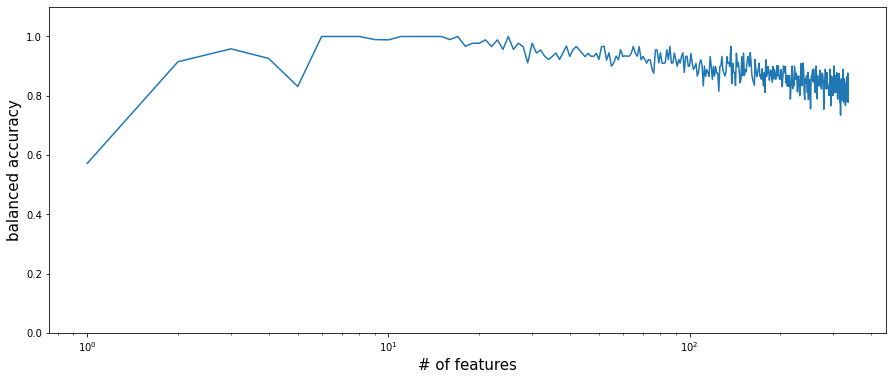

In [ ]:
x_axis = range(1, 336 + 1)
y_axis = list(reversed(rocs))
plt.figure(figsize=(15,6))
plt.plot(x_axis, y_axis)
plt.ylim([0, 1.1])
plt.xscale("log")
plt.xlabel("# of features", fontsize=15)
plt.ylabel("balanced accuracy", fontsize=15)
plt.show()

In [ ]:
rocs.index(max(rocs))

321

In [ ]:
rocs

[0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444444446,
 0.8444444444

In [ ]:
rocs=[0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9327651515151515,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9214015151515151,
 0.9327651515151515,
 0.9327651515151515,
 0.9214015151515151,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9441287878787878,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9327651515151515,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9441287878787878,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9441287878787878,
 0.9441287878787878,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9441287878787878,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9441287878787878,
 0.9441287878787878,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9441287878787878,
 0.9431818181818181,
 0.9545454545454546,
 0.9545454545454546,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9659090909090909,
 0.9772727272727273,
 0.9772727272727273,
 0.9668560606060606,
 0.9668560606060606,
 0.9772727272727273,
 0.9668560606060606,
 0.9772727272727273,
 0.978219696969697,
 0.9772727272727273,
 0.9886363636363636,
 0.9886363636363636,
 0.9678030303030303,
 0.978219696969697,
 0.9678030303030303,
 0.9678030303030303,
 0.978219696969697,
 0.978219696969697,
 0.978219696969697,
 0.9895833333333333,
 0.9791666666666667,
 0.9895833333333333,
 0.9895833333333333,
 0.8011363636363636,
 0.5303030303030303]

In [ ]:
C

1e-05

In [ ]:
X_norm[counts2[-3:]]

Unnamed: 0,chr12:3641731-3641838|-|3638457|3648541,chr11:406875-406993|-|406538|407061,chr6:18187791-18188002|+|18185810|18197056
ERR6745775,0.536420,0.711838,-0.393218
ERR6745776,-1.023989,0.631233,-1.446620
ERR6745777,0.722429,0.838503,-0.307226
ERR6745778,-1.416675,-1.959648,0.380710
ERR6745779,0.030062,0.113057,-1.790588
ERR6745780,0.877436,0.516083,-0.866174
ERR6745781,0.267740,0.308812,0.853666
ERR6745782,-0.972320,-0.359060,1.154638
ERR6745783,0.174736,0.965169,0.316216
ERR6745784,1.094447,0.792443,-0.522206


In [ ]:
kfold = StratifiedKFold(n_splits=2, shuffle=False)
estimator = LinearSVC(penalty='l2', loss = 'hinge', dual = True, C=1e-5, max_iter=1000000)
cv_results = cross_val_predict(estimator, X_norm[counts2[-15:]], y3, cv=kfold, n_jobs=-1)
#cv_results = cross_validate(estimator, X_norm[counts2[-3:]], y3, cv=kfold, scoring='precision', n_jobs=-1)

In [ ]:
y3

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
cv_results

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
pd.crosstab(cv_results, y3)
#row is cv results, column is y3

col_0,0,1
row_0,,
0,44,0
1,1,10


In [ ]:
7/8

0.875